please enter a fileLocation:

 example: C:\Users\Hayden\6070\	C:\Users\Hayden\6070\
Government employment average per month (thousands)
Republican:	2787780
Democrat:	2657076
Difference:	4.9%
Private employment average per month (thousands)
Republican:	13800103
Democrat:	13215985
Difference:	4.4%
Private employment summary (thousands)
President	 First Month	 Last Month	 Change	 Party
Nixon & Ford		61927	65373	5.6%	Republican

Carter		65634	74570	13.6%	Democrat

Clinton		90893	111905	23.1%	Democrat

Bush_2		111863	112283	0.4%	Republican

Government employment summary (thousands)
President	 First Month	 Last Month	 Change	 Party
Nixon & Ford		13690	15075	10.1%	Republican

Carter		15056	16373	8.7%	Democrat

Clinton		18901	20804	10.1%	Democrat

Bush_2		20835	22556	8.3%	Republican


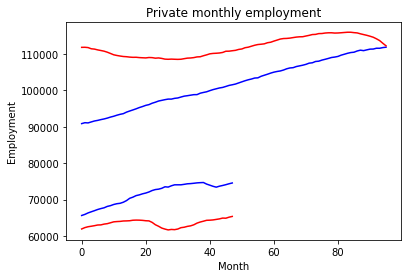

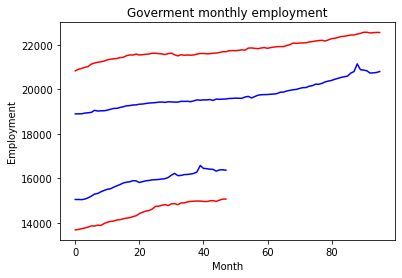

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

#global list
writeData=[]

#file locations + names

# fileLocation = "C:\\Users\\Hayden\\6070\\"
fileLocation=input("please enter a fileLocation:\n\n ""example: C:\\Users\\Hayden\\6070\\\t" )

privEmpFile=fileLocation+"private_employment.txt"
govEmpFile=fileLocation+"government_employment.txt"
presidentFile=fileLocation+"presidents.txt"

#convert string list to int list
def convertStrToInt(aList):
    newList = []
    for i in range(0, len(aList)):
        newList.insert(i,int(aList[i]))

    return newList
def getNMonthSummary(dict,year,month):
    return dict[year][month]


def empFileRead(aFile):
    myData = {}                                     #empty dictionary -- scope is within this function
    with open(aFile) as f:
        dataList = f.readlines()
        for line in dataList[1:len(dataList)]:      #loop through list; start at 1 to ignore header
            lineSplit = line.split(",")             #split row by comma
            year = int(lineSplit[0])                #first index of split

            intList = convertStrToInt(lineSplit[1:len(line)]) #convert str list to int list
            myData[year] = intList

    return myData        


class President:
    privFirstMonth=0
    privLastMonth=0
    privChange=0
    govFirstMonth=0
    govLastMonth=0
    govChange=0
    yearsActive=0
    monthsActive=0
    def __init__(self,dataIN):
        dataSplit = dataIN.split(",")
        yearSplit = dataSplit[1].split("-")
        self.name=dataSplit[0]
        self.startYear=int(yearSplit[0])
        self.endYear=int(yearSplit[1])
        self.party=dataSplit[2]
        self.yearsActive=(self.endYear-self.startYear)+1
        self.monthsActive=self.yearsActive*12   
    def getPrivData(self):
        s=self.name+"\t\t"
        s+=str(self.privFirstMonth)+"\t"
        s+=str(self.privLastMonth)+"\t"
        s+="{:.1%}".format(self.privChange)+"\t"
        s+=self.party
        return s
    def getGovData(self):
        s=self.name+"\t\t"
        s+=str(self.govFirstMonth)+"\t"
        s+=str(self.govLastMonth)+"\t"
        s+="{:.1%}".format(self.govChange)+"\t"
        s+=self.party
        return s

        
    
def presFileRead(aFile):
    myData = []
    with open(aFile) as f:
        dataList=f.readlines()
        for line in dataList [0:len(dataList)]:
            myData.append(President(line))
    return myData







def getPlotData(dict,pres):
    myData = {} 
#     termPeriod=((pres.endYear-pres.startYear)+1)*12
#     for x in range(termPeriod):
#         myData[x]=dict
    startPosition=0
    endPosition=11
    
    for i in range(pres.startYear,pres.endYear+1):
        k=0
        for j in range(startPosition,endPosition+1):
#             print(j)
            myData[j]=dict[i][k]
            k+=1
#             print(str(j)+" : "+str(myData[j]))
        temp=endPosition
        startPosition=endPosition+1
        endPosition=temp+12
    return myData



presidents=presFileRead(presidentFile)
privateData=empFileRead(privEmpFile)
govData=empFileRead(govEmpFile)


# # #Calculate for each president
# for p in presidents:
#     p.privFirstMonth=getNMonthSummary(privateData, p.startYear,0)
#     p.privLastMonth=getNMonthSummary(privateData, p.endYear,11)
#     p.privChange=((p.privLastMonth-p.privFirstMonth)/(p.privFirstMonth))
#     p.govFirstMonth=getNMonthSummary(govData, p.startYear, 0)
#     p.govLastMonth=getNMonthSummary(govData, p.endYear,11)
#     p.govChange=((p.govLastMonth-p.govFirstMonth)/(p.govFirstMonth))



    
def sumYearRange(data, startyear,endyear):
    total=0
    months=0
    
    
    for i in range(startyear,endyear+1):
        total+=sum(data[i])
#         months+=sum(i)
    return total

# sumYearRange(govData,1973,1974)    
democratprivtotal=0
republicanprivtotal=0
republicantotalmonth=0
democratgovtotal=0
republicangovtotal=0
democrattotalmonth=0
# for p in presidents:

#     if ("DEMOCRAT" in p.party.upper()):
#         democratgovtotal+=sumYearRange(govData,p.startYear,p.endYear)
#         democratprivtotal+=sumYearRange(privateData,p.startYear,p.endYear)
#         democrattotalmonth+=p.monthsActive
#     if("REPUBLICAN" in p.party.upper()):
#         republicangovtotal+=sumYearRange(govData,p.startYear,p.endYear)
#         republicanprivtotal+=sumYearRange(privateData,p.startYear,p.endYear)
#         republicantotalmonth+=p.monthsActive

#Average calculations
# repGovAvg=republicangovtotal/republicantotalmonth
# demGovAvg=democratgovtotal/democrattotalmonth
# demPrivAvg=democratprivtotal/democrattotalmonth
# repPrivAvg=republicanprivtotal/republicantotalmonth



#note: this difference is calculated as (larger value – smaller value)/smaller value]
def getDifference(numA,numB):
    small=0
    large=0
    calc=0
    if numA > numB:
        large=numA
        small=numB
    else:
        large=numB
        small=numA
    calc=((large-small)/small)
    return calc




#Difference Caluclation
# diffGov=getDifference(repGovAvg, demGovAvg)
# diffPriv=getDifference(repPrivAvg, demPrivAvg)



# Government average data
# writeData.append("Government employment average per month (thousands)")
# writeData.append("Republican:\t"+str(republicangovtotal))
# writeData.append("Democrat:\t"+str(democratgovtotal))
# writeData.append("Difference:\t"+"{:.1%}".format(diffGov))

# #Private average data
# writeData.append("Private employment average per month (thousands)")
# writeData.append("Republican:\t"+str(republicanprivtotal))
# writeData.append("Democrat:\t"+str(democratprivtotal))
# writeData.append("Difference:\t"+"{:.1%}".format(diffPriv))


#Print each president
# writeData.append("Private employment summary (thousands)")
# writeData.append("President\t First Month\t Last Month\t Change\t Party")
# for p in presidents:
#     writeData.append('{0:>10}'.format(p.getPrivData()))
    
# writeData.append("\n""Government employment summary (thousands)")
# writeData.append("President\t First Month\t Last Month\t Change\t Party")

# for p in presidents:
#     writeData.append((p.getGovData().rjust(10)))


#write Data loop
# with open('output_Hancock_Hayden.txt', 'w') as f:
#     for w in writeData:
#         print(w)
#         f.write(w+"\n")
        
        
#plotting private data
# for p in presidents:
#     currentData=getPlotData(privateData,p).items()
#     x,y=zip(*currentData)
    
#     if ("DEMOCRAT" in p.party.upper()):
#         plt.plot(x,y,color='b')
#     else:
#         plt.plot(x,y,color='r')
# #     plt.text()
# plt.title("Private monthly employment")
# plt.xlabel("Month")
# plt.ylabel("Employment")
# plt.show()

# for p in presidents:
#     currentData=getPlotData(govData,p).items()
#     x,y=zip(*currentData)
    
#     if ("DEMOCRAT" in p.party.upper()):
#         plt.plot(x,y,color='b')
#     else:
#         plt.plot(x,y,color='r')
# plt.title("Goverment monthly employment")
# plt.xlabel("Month")
# plt.ylabel("Employment")    
# plt.show()


# print(privateData)
# print(govData)

#for graphs-"blackbox"
#for goverment monthly employment
# employment=range(12000,24000,2000)
# month= range(1,100,20)
# def drawCurve():
#     d={}


# plt.plot()
# plt.xlim(1,100)
# plt.ylim(12000,24000)
# plt.title("Goverment monthly employment")
# plt.xlabel("Month")
# plt.ylabel("Employment")

# plt.show()

#for private monthly employment



# plt.plot(1, 20000)
# plt.plot(3,40000)
# plt.plot(5,6)
# plt.xlim(0,100)
# plt.ylim(12000,24000,2000)
# plt.title("Private monthly employment")
# plt.xlabel("Month")
# plt.ylabel("Employment")

# plt.show()

#create a function called main
#throw anything that is not a function or class aka variable
def main():
    
#     fileLocation = "C:\\Users\\Hayden\\6070\\"
    presidents=presFileRead(presidentFile)
    privateData=empFileRead(privEmpFile)
    govData=empFileRead(govEmpFile)
    
    for p in presidents:
        p.privFirstMonth=getNMonthSummary(privateData, p.startYear,0)
        p.privLastMonth=getNMonthSummary(privateData, p.endYear,11)
        p.privChange=((p.privLastMonth-p.privFirstMonth)/(p.privFirstMonth))
        p.govFirstMonth=getNMonthSummary(govData, p.startYear, 0)
        p.govLastMonth=getNMonthSummary(govData, p.endYear,11)
        p.govChange=((p.govLastMonth-p.govFirstMonth)/(p.govFirstMonth))
    democratprivtotal=0
    republicanprivtotal=0
    republicantotalmonth=0
    democratgovtotal=0
    republicangovtotal=0
    democrattotalmonth=0

    for p in presidents:

        if ("DEMOCRAT" in p.party.upper()):
            democratgovtotal+=sumYearRange(govData,p.startYear,p.endYear)
            democratprivtotal+=sumYearRange(privateData,p.startYear,p.endYear)
            democrattotalmonth+=p.monthsActive
        if("REPUBLICAN" in p.party.upper()):
            republicangovtotal+=sumYearRange(govData,p.startYear,p.endYear)
            republicanprivtotal+=sumYearRange(privateData,p.startYear,p.endYear)
            republicantotalmonth+=p.monthsActive

#Average calculations
    repGovAvg=republicangovtotal/republicantotalmonth
    demGovAvg=democratgovtotal/democrattotalmonth
    demPrivAvg=democratprivtotal/democrattotalmonth
    repPrivAvg=republicanprivtotal/republicantotalmonth
    
    diffGov=getDifference(repGovAvg, demGovAvg)
    diffPriv=getDifference(repPrivAvg, demPrivAvg)
    
# Government average data
    writeData.append("Government employment average per month (thousands)")
    writeData.append("Republican:\t"+str(republicangovtotal))
    writeData.append("Democrat:\t"+str(democratgovtotal))
    writeData.append("Difference:\t"+"{:.1%}".format(diffGov))

#Private average data
    writeData.append("Private employment average per month (thousands)")
    writeData.append("Republican:\t"+str(republicanprivtotal))
    writeData.append("Democrat:\t"+str(democratprivtotal))
    writeData.append("Difference:\t"+"{:.1%}".format(diffPriv))

#Print each president
    writeData.append("Private employment summary (thousands)")
    writeData.append("President\t First Month\t Last Month\t Change\t Party")
    for p in presidents:
        writeData.append('{0:>10}'.format(p.getPrivData()))
    
    writeData.append("\n""Government employment summary (thousands)")
    writeData.append("President\t First Month\t Last Month\t Change\t Party")

    for p in presidents:
        writeData.append((p.getGovData().rjust(10)))
        
#write Data loop
    with open('Output_Hancock_Hayden', 'w') as f:
        for w in writeData:
            print(w)
            f.write(w+"\n") 
            
    for p in presidents:
        currentData=getPlotData(privateData,p).items()
        x,y=zip(*currentData)
    
        if ("DEMOCRAT" in p.party.upper()):
            plt.plot(x,y,color='b')
        else:
            plt.plot(x,y,color='r')
#     plt.text()
    plt.title("Private monthly employment")
    plt.xlabel("Month")
    plt.ylabel("Employment")
    plt.show()

    for p in presidents:
        currentData=getPlotData(govData,p).items()
        x,y=zip(*currentData)
    
        if ("DEMOCRAT" in p.party.upper()):
            plt.plot(x,y,color='b')
        else:
            plt.plot(x,y,color='r')
    plt.title("Goverment monthly employment")
    plt.xlabel("Month")
    plt.ylabel("Employment")    
    plt.show()


main()
    


In [ ]:
presidents